# CNN FLOWERS CLASSIFICATION

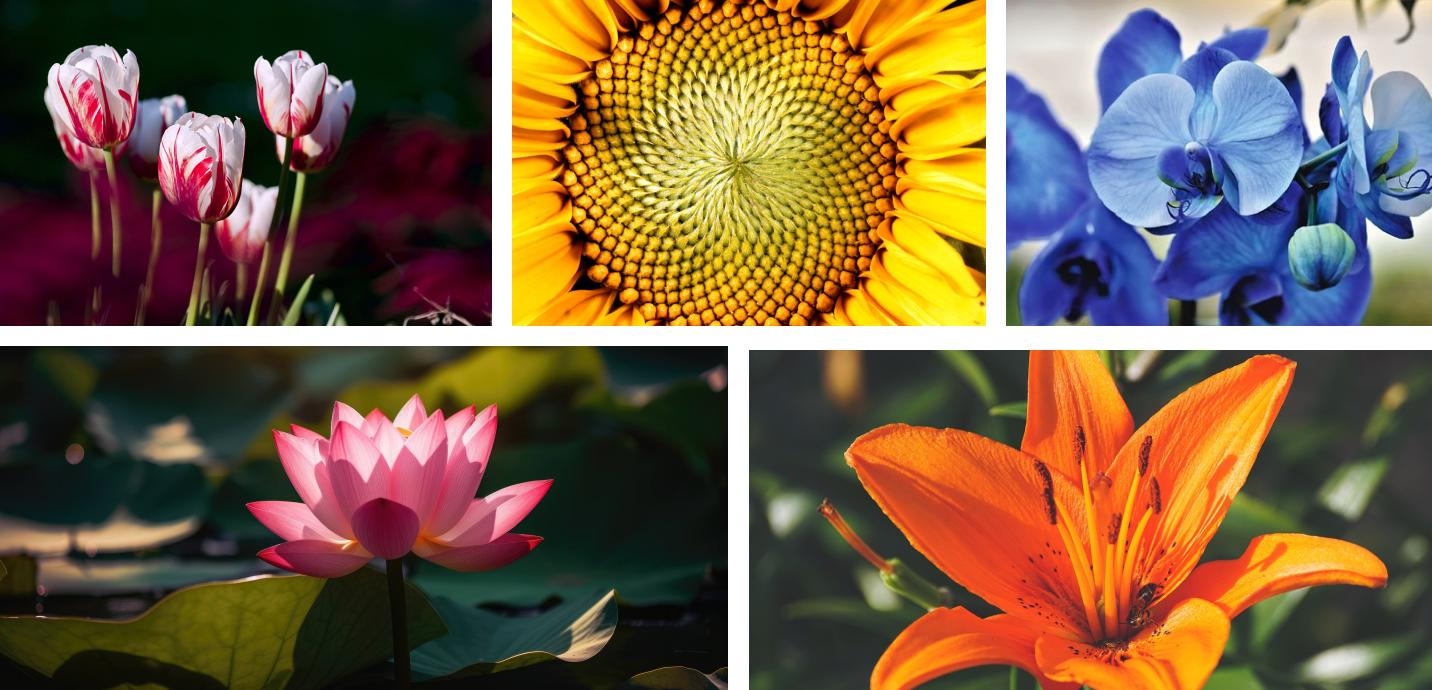

##### DS Trainer Mr. ANKIT MISHRA

In [2]:
flower_loc = r"D:\flower_photos\flower_photos"
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2  # opencv
import pathlib

In [2]:
flower_dir = pathlib.Path(flower_loc)

In [3]:
import glob

In [4]:
glob.glob('*.*')

['ANN_ Attrition Rate_Churn Rate.ipynb',
 'class 8_Activation func.ipynb',
 'Class_9_Loss Functions.ipynb',
 'CNN.ipynb',
 'CNN_cifar_10.ipynb',
 'cnn_model.pkl',
 'Day 4_DL.ipynb',
 'Day 6_ 7_Activation Functions.ipynb',
 'Day2.ipynb',
 'day3.ipynb',
 'Day4.ipynb',
 'Day5.ipynb',
 'FB.ipynb',
 'Flowers Classification.ipynb',
 'gd_and_sgd.ipynb',
 'Gradient_descent_from_scratch.ipynb',
 'Optimizers.ipynb',
 'resized_image.jpg',
 'student_scores.csv',
 'Untitled.ipynb']

In [5]:
'student_scores.csv' in glob.glob('*.*')

True

In [6]:
len(list(flower_dir.glob('*/*')))

3670

In [7]:
X = []
classes = []
y = []
image_size = (150,150)

for index,folder_name in enumerate(flower_dir.glob('*')):
    for flower_path in folder_name.glob('*'):
        arr = cv2.imread(str(flower_path))
        final_arr = cv2.resize(arr,image_size)
        
        X.append(final_arr)
        
        y.append(index)
        classes.append(str(folder_name).split('\\')[-1])
        
        


In [8]:
print(len(X))
print(len(y))
print(len(classes))

3670
3670
3670


In [9]:
# classes

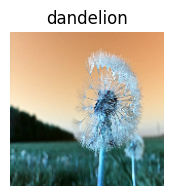

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(X[700])
plt.title(classes[700])
plt.axis('off')
plt.show()

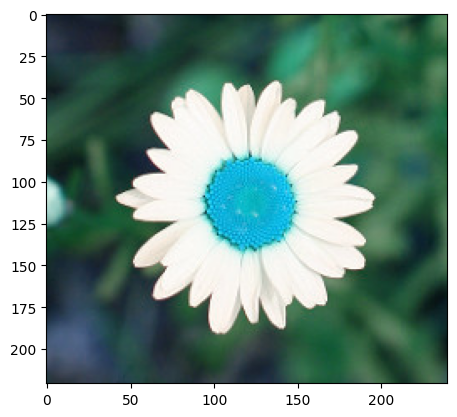

In [11]:
plt.imshow(cv2.imread(r"D:\flower_photos\flower_photos\daisy\525780443_bba812c26a_m.jpg"))

In [12]:
a = plt.imread(r"D:\flower_photos\flower_photos\daisy\525780443_bba812c26a_m.jpg")

In [13]:
a.shape

(221, 240, 3)

In [14]:
b = cv2.resize(a,(1500,1500))

In [15]:
b.shape

(1500, 1500, 3)

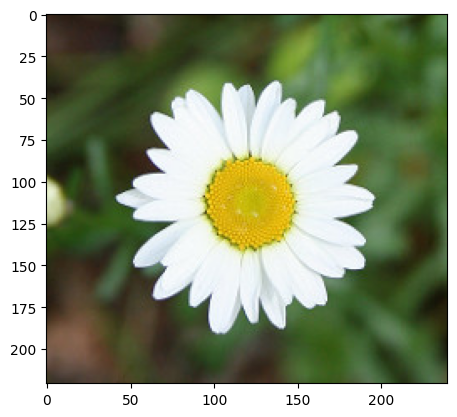

In [16]:
plt.imshow(a)

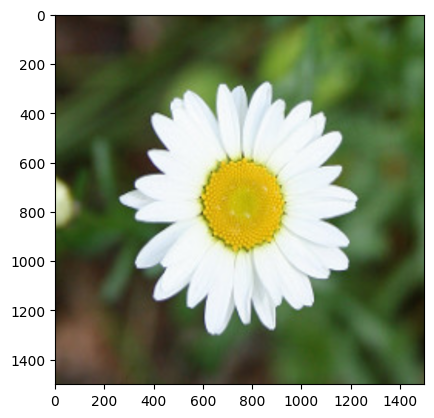

In [17]:
plt.imshow(b)

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [22]:
X_train.shape

(2936, 150, 150, 3)

In [23]:
y_train.shape

(2936,)

In [24]:
X_test.shape

(734, 150, 150, 3)

In [25]:
y_test.shape

(734,)

In [26]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# CNN Model

#### Without Augmentation

In [27]:
output_class = len(set(y))

model_cnn_wa =  Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(60,activation='relu'),
    Dense(output_class,activation='softmax')
])



model_cnn_wa.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


model_cnn_wa.fit(X_train_scaled,y_train,epochs=10)




Epoch 1/10


92/92 [==============================] - 39s 380ms/step - loss: 1.3584 - accuracy: 0.4033
Epoch 2/10
92/92 [==============================] - 34s 375ms/step - loss: 1.0508 - accuracy: 0.5838
Epoch 3/10
92/92 [==============================] - 41s 448ms/step - loss: 0.9174 - accuracy: 0.6454
Epoch 4/10
92/92 [==============================] - 34s 367ms/step - loss: 0.8159 - accuracy: 0.6805
Epoch 5/10
92/92 [==============================] - 32s 346ms/step - loss: 0.7293 - accuracy: 0.7159
Epoch 6/10
92/92 [==============================] - 33s 354ms/step - loss: 0.6335 - accuracy: 0.7558
Epoch 7/10
92/92 [==============================] - 36s 387ms/step - loss: 0.5467 - accuracy: 0.7960
Epoch 8/10
92/92 [==============================] - 31s 332ms/step - loss: 0.5002 - accuracy: 0.8120
Epoch 9/10
92/92 [==============================] - 31s 334ms/step - loss: 0.3581 - accuracy: 0.8651
Epoch 10/10
92/92 [==============================] - 31s 335ms/step - loss: 0.3244 - a

In [28]:
model_cnn_wa.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 4s 137ms/step - loss: 1.0999 - accuracy: 0.6907


[1.099910855293274, 0.6907356977462769]

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
y_pred = [np.argmax(i) for i in model_cnn_wa.predict(X_test_scaled)]

23/23 [==============================] - 2s 103ms/step


In [31]:
pd.Series(y_pred == y_test).value_counts()

True     507
False    227
Name: count, dtype: int64

In [32]:
pd.Series(y_pred == y_test).value_counts().sum()

734

In [34]:
1 - 507/734

0.3092643051771117

In [35]:
np.linspace(0,4,5)

array([0., 1., 2., 3., 4.])

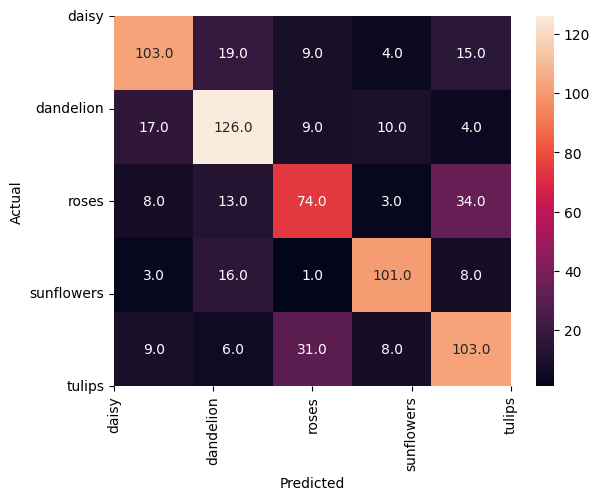

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = '.1f')
plt.xlabel('Predicted')
plt.xticks(ticks=np.linspace(0,5,5),labels=pd.Series(classes).unique(),rotation = 90)
plt.yticks(ticks=np.linspace(0,5,5),labels=pd.Series(classes).unique(),rotation = 0)
plt.ylabel('Actual')
plt.show()

In [37]:
confusion_matrix(y_test,y_pred)

array([[103,  19,   9,   4,  15],
       [ 17, 126,   9,  10,   4],
       [  8,  13,  74,   3,  34],
       [  3,  16,   1, 101,   8],
       [  9,   6,  31,   8, 103]], dtype=int64)

In [38]:
# 95+135+73+85+99

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       150
           1       0.70      0.76      0.73       166
           2       0.60      0.56      0.58       132
           3       0.80      0.78      0.79       129
           4       0.63      0.66      0.64       157

    accuracy                           0.69       734
   macro avg       0.69      0.69      0.69       734
weighted avg       0.69      0.69      0.69       734



In [41]:
pd.Series(classes).unique()

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype=object)

In [42]:
classes = pd.Series(classes).unique()
classes    

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype=object)

In [43]:
def predict_flower_1(flower_image_path):
    f_ar = cv2.imread(flower_image_path)
    plt.imshow(f_ar)  
    
    final_flower_arr = np.expand_dims(cv2.resize(f_ar,image_size),axis=0)
    
    final_flower_arr = final_flower_arr/255
    
    y_clas = [np.argmax(i) for i in model_cnn_wa.predict(final_flower_arr)][0]
    
    flower_name = classes[y_clas]
    
    plt.title(flower_name)

1/1 [==============================] - 0s 32ms/step


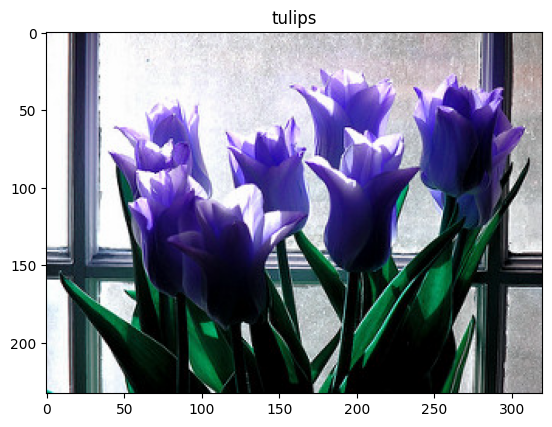

In [44]:
path =  r"D:\flower_photos\flower_photos\tulips\112951022_4892b1348b_n.jpg"

predict_flower_1(path)

In [45]:
from tensorflow.keras import layers

In [46]:
data_Augmentation = Sequential([
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.1) 
])

In [47]:
# data_Augmentation(X_train)

# With Augementation

In [49]:
output_class = len(set(y))

model_cnn_with_aug =  Sequential([
    data_Augmentation,
    
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(60,activation='relu'),
    Dense(output_class,activation='softmax')
])



model_cnn_wa.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


model_cnn_wa.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
83/92 [==========================>...] - ETA: 3s - loss: 0.2278 - accuracy: 0.9206


KeyboardInterrupt



In [ ]:
def predict_flower_2(flower_image_path):
    f_ar = cv2.imread(flower_image_path)
    plt.imshow(f_ar)  
    
    final_flower_arr = np.expand_dims(cv2.resize(f_ar,image_size),axis=0)
    
    final_flower_arr = final_flower_arr/255
    
    y_clas = [np.argmax(i) for i in model_cnn_with_aug.predict(final_flower_arr)][0]
    
    flower_name = classes[y_clas]
    
    plt.title(flower_name)

In [ ]:
predict_flower_2(path)